In [26]:
from sinkhorn_knopp import compute_optimal_transport

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

%matplotlib inline

## The dessert problem

In [27]:
from desserts import preferences, portions_per_person,quantities_of_dessert

Take a look at the preferences for desserts.

In [28]:
preferences

,merveilleux,eclair,chocolate mousse,bavarois,carrot cake
Bernard,2.0,2,1,0,0
Jan,0.0,-2,-2,-2,2
Willem,1.0,2,2,2,-1
Hilde,2.0,1,0,1,-1
Steffie,0.5,2,2,1,0
Marlies,0.0,1,1,1,-1
Tim,-2.0,2,2,1,1
Wouter,2.0,1,2,1,-1


In [29]:
M = - preferences.values  # cost is negative preferences

How many portions per person.

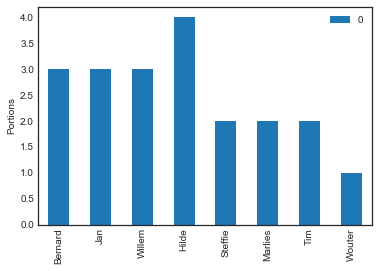

In [30]:
ax = portions_per_person.plot(kind='bar')
ax.set_ylabel('Portions')
r = portions_per_person.values.ravel()  # store as vector

How much of every dessert.

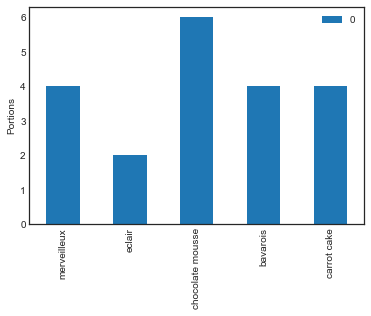

In [31]:
ax = quantities_of_dessert.plot(kind='bar')
ax.set_ylabel('Portions')
c = quantities_of_dessert.values.ravel()  # store as vector

Compute optimal transport (low entropic regularization).

[[7.99158597e-01 1.99568568e+00 1.12085918e-01 9.05856171e-06
  9.30607055e-02]
 [1.09448200e-16 5.63349807e-25 6.96918316e-22 1.24060890e-21
  3.00000006e+00]
 [1.58533610e-08 8.72017766e-04 1.07877050e+00 1.92035746e+00
  1.84609784e-09]
 [3.20051781e+00 3.62856239e-04 2.03794991e-05 7.99081983e-01
  1.69203286e-05]
 [1.97855229e-10 1.61519115e-03 1.99814801e+00 1.61486362e-04
  7.53178867e-05]
 [1.05687641e-08 5.81337298e-04 7.19170587e-01 1.28022096e+00
  2.71083065e-05]
 [1.50197801e-21 8.82880686e-04 1.09220899e+00 8.82701656e-05
  9.06819885e-01]
 [3.23564933e-04 3.66839248e-08 9.99595616e-01 8.07853365e-05
  1.71060601e-09]]
Sinkhorn distance: -35.99488284337748


Text(0.5,1,'Optimal distribtution ($\\lambda=10$)')

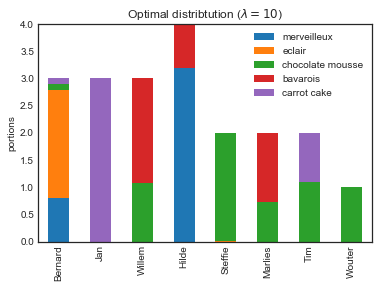

In [32]:
lam = 10

P, d = compute_optimal_transport(M,
        r,
        c, lam=lam)

print(P)

partition = pd.DataFrame(P, index=preferences.index, columns=preferences.columns)
ax = partition.plot(kind='bar', stacked=True)
print('Sinkhorn distance: {}'.format(d))
ax.set_ylabel('portions')
ax.set_title('Optimal distribtution ($\lambda={}$)'.format(lam))

[[1.12456122 0.54032425 0.77999147 0.24496256 0.3101605 ]
 [0.180761   0.01175404 0.04612294 0.03937507 2.72198697]
 [0.24830085 0.32429783 1.27254725 1.08637126 0.06848281]
 [1.88190831 0.33264066 0.48018736 1.11431906 0.19094459]
 [0.12909175 0.27797874 1.09079075 0.34257157 0.15956719]
 [0.15928602 0.2080384  0.81634433 0.69691166 0.11941958]
 [0.0098312  0.25790279 1.01201258 0.31783065 0.40242277]
 [0.26625965 0.04706329 0.50200332 0.15765816 0.02701558]]
Sinkhorn distance: -29.626499497606346


Text(0.5,1,'Optimal distribtution ($\\lambda=1$)')

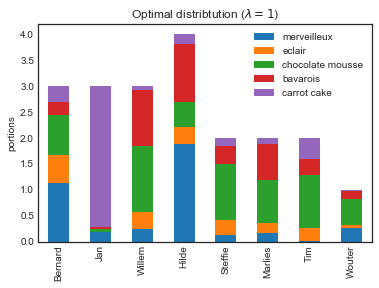

In [33]:
lam = 1

P, d = compute_optimal_transport(M,
        r,
        c, lam=lam)

print(P)

partition = pd.DataFrame(P, index=preferences.index, columns=preferences.columns)
ax = partition.plot(kind='bar', stacked=True)
print('Sinkhorn distance: {}'.format(d))
ax.set_ylabel('portions')
ax.set_title('Optimal distribtution ($\lambda={}$)'.format(lam))